In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
data = pd.read_csv('../logs/fig_1_20230328-210142.csv')
data

,Operation,Size (MB),Ratio,Latency,Throughput
0,SHORT SCAN,2048,1.0,107.22,6708.83
1,SHORT SCAN,2048,0.8,106.23,6758.20
2,SHORT SCAN,4096,1.0,191.89,4276.26
3,SHORT SCAN,4096,0.8,178.13,4544.18
4,SHORT SCAN,8192,1.0,317.48,2778.93
5,SHORT SCAN,8192,0.8,278.99,3112.80
6,SHORT SCAN,16384,1.0,454.71,2009.84
7,SHORT SCAN,16384,0.8,414.46,2187.24
8,SHORT SCAN,24576,1.0,528.21,1750.04
9,SHORT SCAN,24576,0.8,545.23,1699.43


,Operation,Size (MB),Ratio,Latency,Throughput
36,READ NO MONKEY,2048,1.0,85.65,7881.15
37,READ NO MONKEY,4096,1.0,150.60,5210.76
38,READ NO MONKEY,8192,1.0,230.25,3678.06
39,READ NO MONKEY,16384,1.0,299.65,2926.21
40,READ NO MONKEY,24576,1.0,323.14,2735.26
41,READ NO MONKEY,32768,1.0,407.03,2222.39


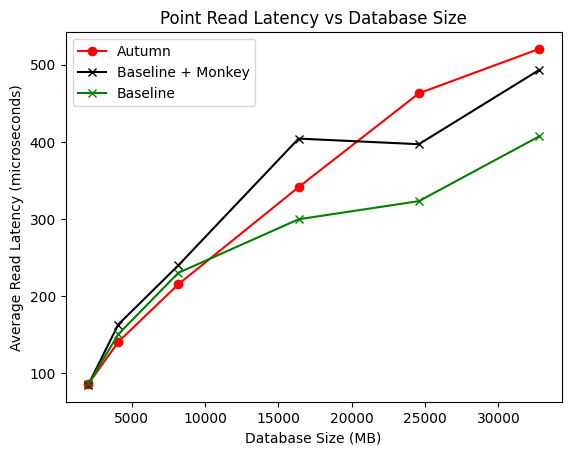

In [18]:
reads = data[data["Operation"] == "READ"]
reads_base = reads[reads["Ratio"] == 1]
reads_test = reads[reads["Ratio"] < 1]
full_baseline_reads = data[data["Operation"] == "READ NO MONKEY"]

plt.plot(reads_test.loc[:, "Size (MB)"], reads_test.loc[:, "Latency"], marker= 'o', color="red")
plt.plot(reads_base.loc[:, "Size (MB)"], reads_base.loc[:, "Latency"], marker='x', color="black")
plt.plot(full_baseline_reads.loc[:, "Size (MB)"], full_baseline_reads.loc[:, "Latency"], marker='x', color="green")


plt.title("Point Read Latency vs Database Size")
plt.xlabel("Database Size (MB)")
plt.ylabel("Average Read Latency (microseconds)")
plt.legend(["Autumn", "Baseline + Monkey", "Baseline"])
# # plt.savefig("final_figs/read_vs_size.jpg", bbox_inches="tight")

full_baseline_reads

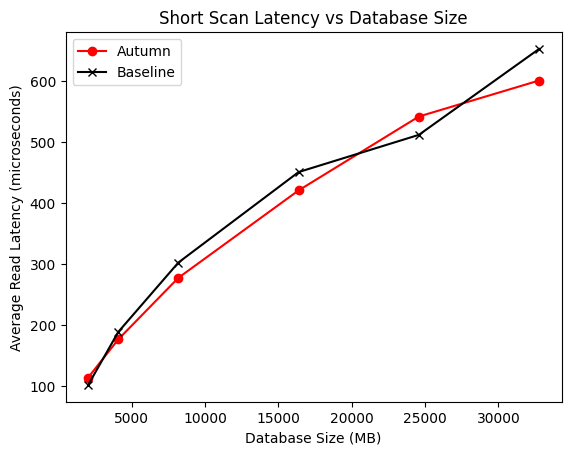

In [4]:
reads = data[data["Operation"] == "SHORT SCAN"]
reads_base = reads[reads["Ratio"] == 1]
reads_test = reads[reads["Ratio"] < 1]

plt.plot(reads_test.loc[:, "Size (MB)"], reads_test.loc[:, "Latency"], marker= 'o', color="red")
plt.plot(reads_base.loc[:, "Size (MB)"], reads_base.loc[:, "Latency"], marker='x', color="black")


plt.title("Short Scan Latency vs Database Size")
plt.xlabel("Database Size (MB)")
plt.ylabel("Average Read Latency (microseconds)")
plt.legend(["Autumn", "Baseline"])
# plt.savefig("final_figs/read_vs_size.jpg", bbox_inches="tight")

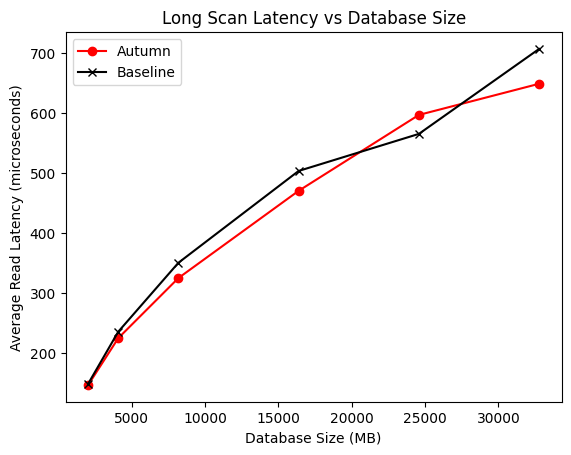

In [5]:
reads = data[data["Operation"] == "LONG SCAN"]
reads_base = reads[reads["Ratio"] == 1]
reads_test = reads[reads["Ratio"] < 1]

plt.plot(reads_test.loc[:, "Size (MB)"], reads_test.loc[:, "Latency"], marker= 'o', color="red")
plt.plot(reads_base.loc[:, "Size (MB)"], reads_base.loc[:, "Latency"], marker='x', color="black")


plt.title("Long Scan Latency vs Database Size")
plt.xlabel("Database Size (MB)")
plt.ylabel("Average Read Latency (microseconds)")
plt.legend(["Autumn", "Baseline"])
# plt.savefig("final_figs/read_vs_size.jpg", bbox_inches="tight")

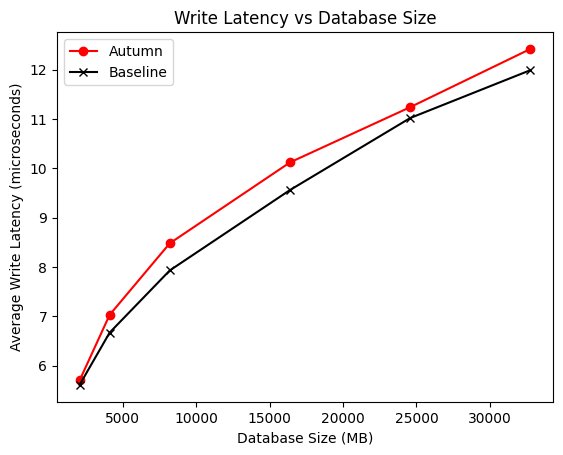

In [6]:
reads = data[data["Operation"] == "WRITE"]
reads_base = reads[reads["Ratio"] == 1]
reads_test = reads[reads["Ratio"] < 1]

plt.plot(reads_test.loc[:, "Size (MB)"], reads_test.loc[:, "Latency"], marker= 'o', color="red")
plt.plot(reads_base.loc[:, "Size (MB)"], reads_base.loc[:, "Latency"], marker='x', color="black")


plt.title("Write Latency vs Database Size")
plt.xlabel("Database Size (MB)")
plt.ylabel("Average Write Latency (microseconds)")
plt.legend(["Autumn", "Baseline"])
# plt.savefig("final_figs/read_vs_size.jpg", bbox_inches="tight")